<a href="https://colab.research.google.com/github/rajkumarr1977/Architecture_Diagram-using-python-/blob/main/Create_Beautiful_Architecture_Diagrams_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create Beautiful Architecture Diagrams with Python


In [1]:
pip install diagrams

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.7/824.7 kB 34.0 MB/s eta 0:00:00


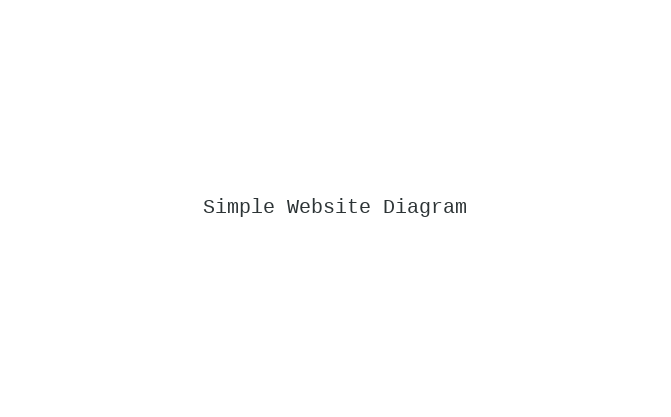

In [2]:
from diagrams import Diagram

with Diagram("Simple Website Diagram") as diag:
    pass
diag # This will illustrate the diagram if you are using a Google Colab or Jypiter notebook.

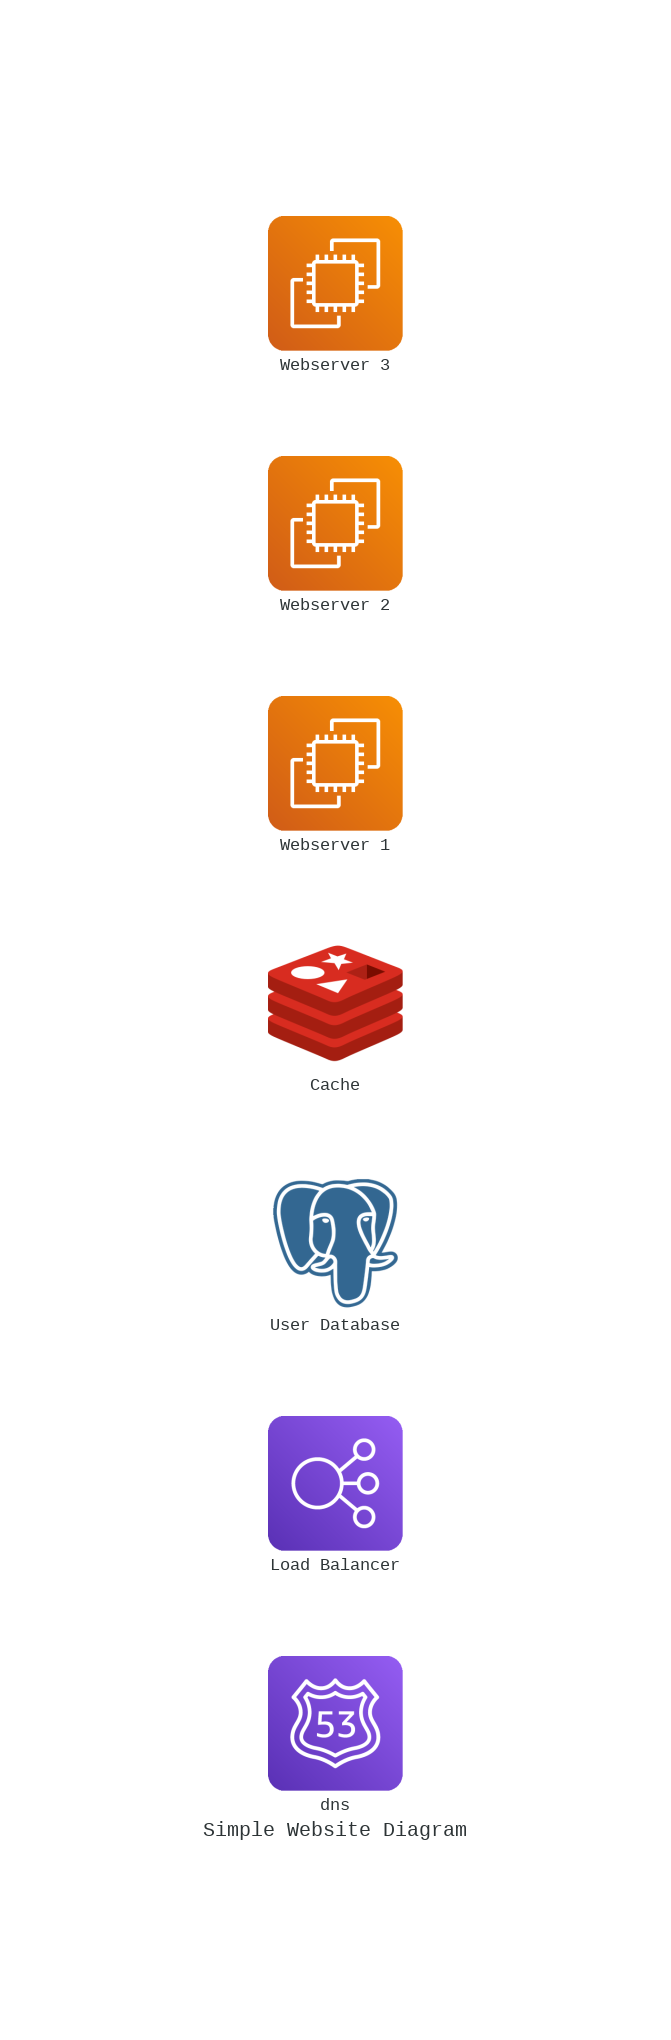

In [3]:
from diagrams import Diagram
from diagrams.aws.compute import EC2
from diagrams.aws.network import ELB
from diagrams.aws.network import Route53
from diagrams.onprem.database import PostgreSQL # Would typically use RDS from aws.database
from diagrams.onprem.inmemory import Redis # Would typically use ElastiCache from aws.database

with Diagram("Simple Website Diagram") as diag:
    dns = Route53("dns")
    load_balancer = ELB("Load Balancer")
    database = PostgreSQL("User Database")
    cache = Redis("Cache")
    svc_group = [EC2("Webserver 1"),
                 EC2("Webserver 2"),
                 EC2("Webserver 3")]
diag # This will illustrate the diagram if you are using a Google Colab or Jypiter notebook.

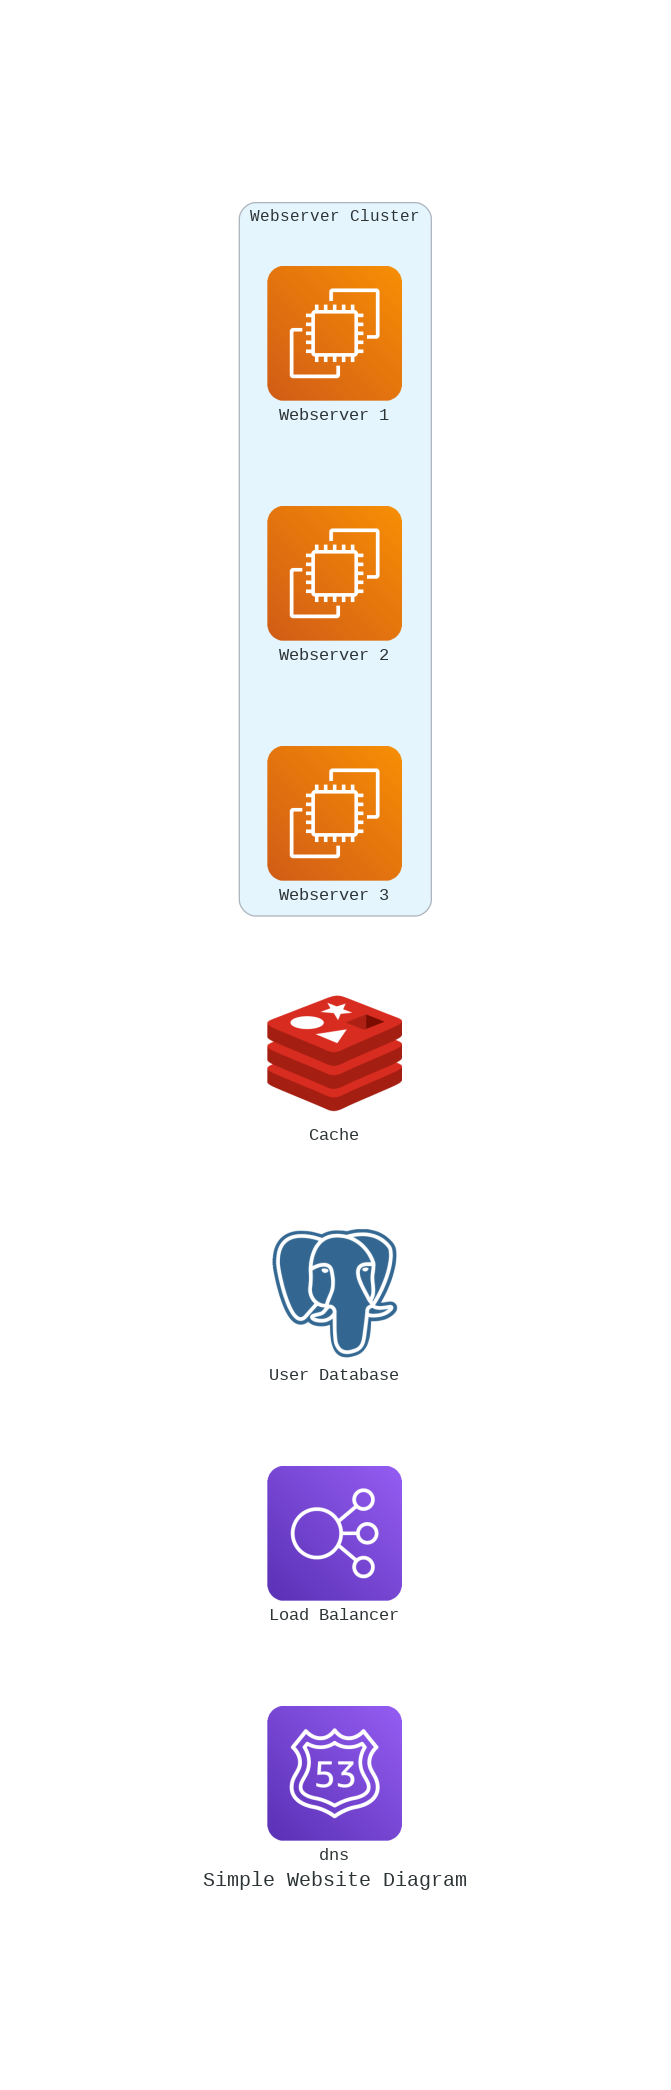

In [4]:
from diagrams import Diagram, Cluster
from diagrams.aws.compute import EC2
from diagrams.aws.network import ELB
from diagrams.aws.network import Route53
from diagrams.onprem.database import PostgreSQL # Would typically use RDS from aws.database
from diagrams.onprem.inmemory import Redis # Would typically use ElastiCache from aws.database

with Diagram("Simple Website Diagram") as diag:
    dns = Route53("dns")
    load_balancer = ELB("Load Balancer")
    database = PostgreSQL("User Database")
    cache = Redis("Cache")
    with Cluster("Webserver Cluster"):
        svc_group = [EC2("Webserver 1"),
                    EC2("Webserver 2"),
                    EC2("Webserver 3")]
diag # This will illustrate the diagram if you are using a Google Colab or Jypiter notebook.

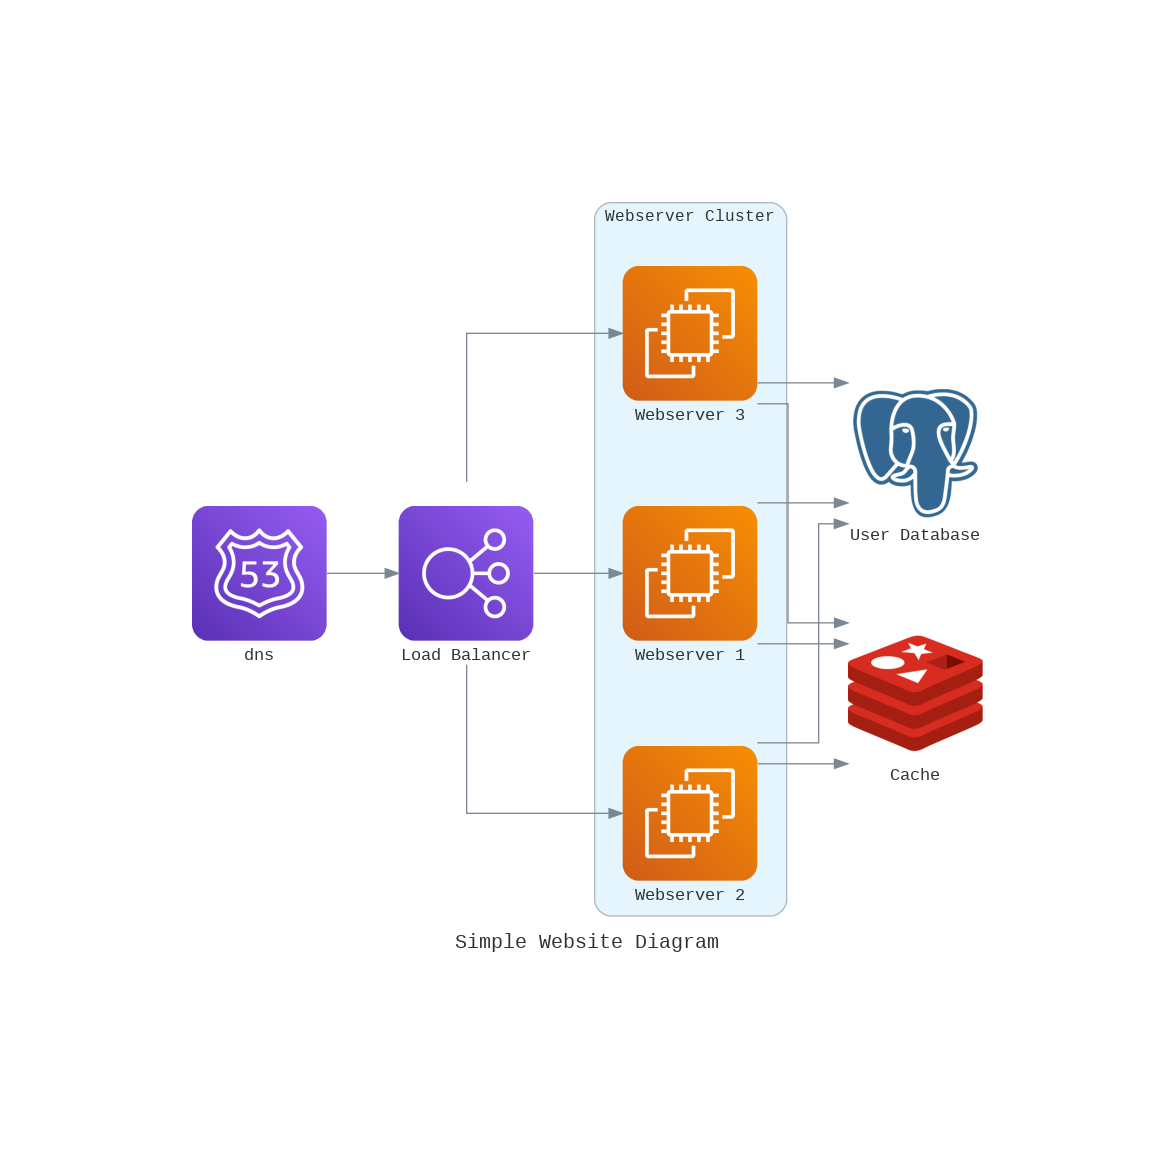

In [5]:
from diagrams import Diagram, Cluster
from diagrams.aws.compute import EC2
from diagrams.aws.network import ELB
from diagrams.aws.network import Route53
from diagrams.onprem.database import PostgreSQL # Would typically use RDS from aws.database
from diagrams.onprem.inmemory import Redis # Would typically use ElastiCache from aws.database

with Diagram("Simple Website Diagram", direction='LR') as diag: # It's LR by default, but you have a few options with the orientation
    dns = Route53("dns")
    load_balancer = ELB("Load Balancer")
    database = PostgreSQL("User Database")
    cache = Redis("Cache")
    with Cluster("Webserver Cluster"):
        svc_group = [EC2("Webserver 1"),
                    EC2("Webserver 2"),
                    EC2("Webserver 3")]
    dns >> load_balancer >> svc_group
    svc_group >> cache
    svc_group >> database
diag # This will illustrate the diagram if you are using a Google Colab or Jypiter notebook.

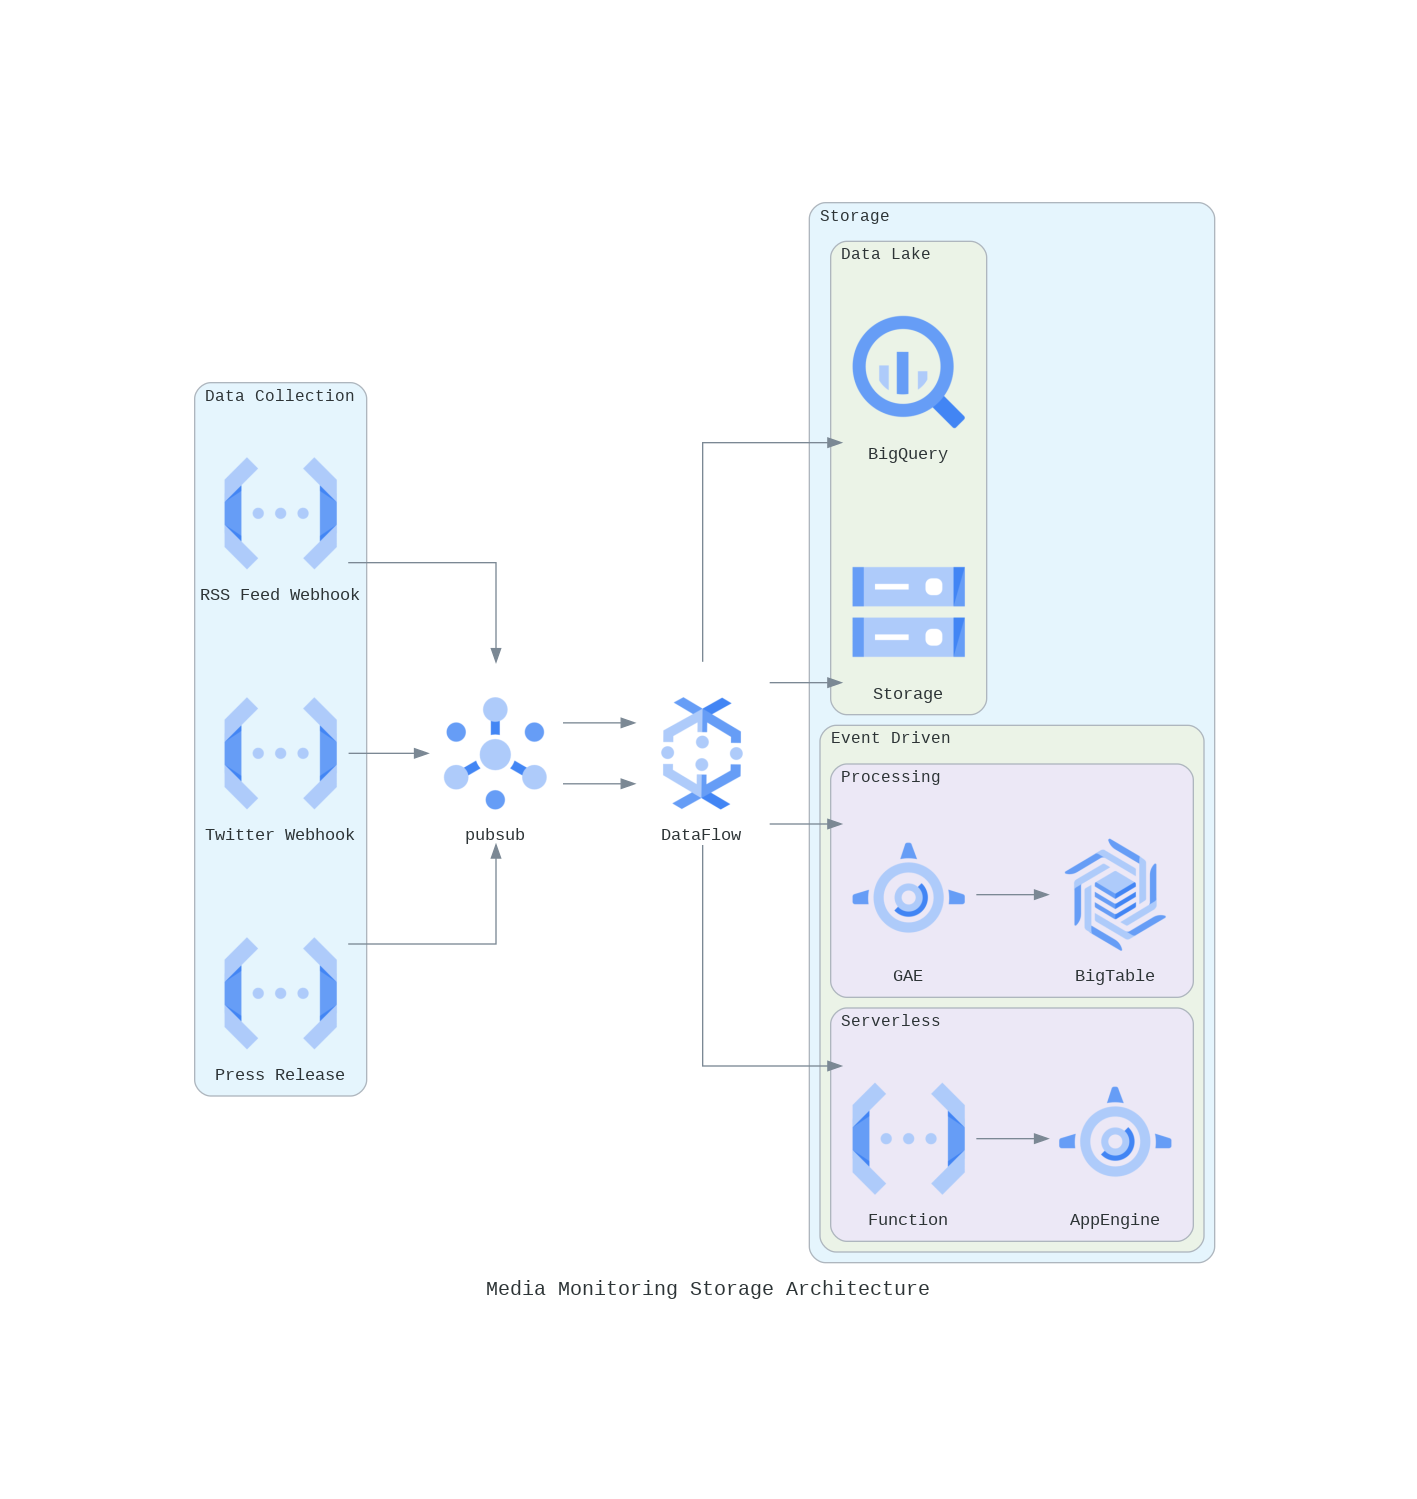

In [6]:
from diagrams import Cluster, Diagram
from diagrams.gcp.analytics import BigQuery, Dataflow, PubSub
from diagrams.gcp.compute import AppEngine, Functions
from diagrams.gcp.database import BigTable
from diagrams.gcp.iot import IotCore
from diagrams.gcp.storage import GCS

with Diagram("Media Monitoring Storage Architecture", show=False) as med_diag:
    pubsub = PubSub("pubsub")
    flow = Dataflow("DataFlow")

    with Cluster("Data Collection"):
        [Functions("RSS Feed Webhook"),
         Functions("Twitter Webhook"),
         Functions("Press Release")] >> pubsub >> flow

    with Cluster("Storage"):
        with Cluster("Data Lake"):
            flow >> [BigQuery("BigQuery"),
                     GCS("Storage")]

        with Cluster("Event Driven"):
            with Cluster("Processing"):
                flow >> AppEngine("GAE") >> BigTable("BigTable")

            with Cluster("Serverless"):
                flow >> Functions("Function") >> AppEngine("AppEngine")

    pubsub >> flow
med_diag